In [13]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

oring_txt = np.genfromtxt("../data/o-ring.data", delimiter="")

In [18]:
oring_txt

array([[   6.,    0.,   66.,   50.,    1.],
       [   6.,    1.,   70.,   50.,    2.],
       [   6.,    0.,   69.,   50.,    3.],
       [   6.,    0.,   68.,   50.,    4.],
       [   6.,    0.,   67.,   50.,    5.],
       [   6.,    0.,   72.,   50.,    6.],
       [   6.,    0.,   73.,  100.,    7.],
       [   6.,    0.,   70.,  100.,    8.],
       [   6.,    1.,   57.,  200.,    9.],
       [   6.,    1.,   63.,  200.,   10.],
       [   6.,    1.,   70.,  200.,   11.],
       [   6.,    0.,   78.,  200.,   12.],
       [   6.,    0.,   67.,  200.,   13.],
       [   6.,    2.,   53.,  200.,   14.],
       [   6.,    0.,   67.,  200.,   15.],
       [   6.,    0.,   75.,  200.,   16.],
       [   6.,    0.,   70.,  200.,   17.],
       [   6.,    0.,   81.,  200.,   18.],
       [   6.,    0.,   76.,  200.,   19.],
       [   6.,    0.,   79.,  200.,   20.],
       [   6.,    2.,   75.,  200.,   21.],
       [   6.,    0.,   76.,  200.,   22.],
       [   6.,    1.,   58.,  20

In [56]:
oring = data.Data(oring_txt[:, [2,3,4]], oring_txt[:,1],              
                     target_names = ["Temperature","Pressure", "Order"],
                      label_names = ["Distress"] , test_size=0  )

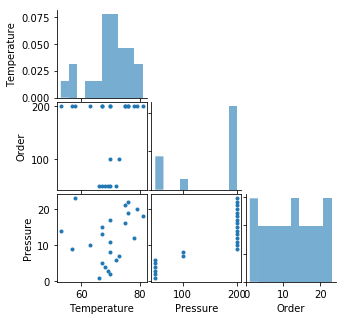

In [57]:
from heron import corner
corner.corner(oring, figsize=(5,5))

In [58]:
from heron import regression
from heron import kernels

In [59]:
gp = regression.Regressor(oring, kernel=kernels.SquaredExponential(ndim=3))

In [60]:
from scipy.optimize import minimize

In [61]:
def nll(p):
    p[0] = 1
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    p[0] = 1
    gp.set_hyperparameters(p)
    return -gp.grad_loglikelihood()

In [62]:
x0 = [0.9]*4
x0[0] = 1
res = minimize(nll, x0, method='BFGS', jac=grad_nll ,options={'disp': True})

         Current function value: 0.499340
         Iterations: 5
         Function evaluations: 113
         Gradient evaluations: 101


In [63]:
i = 0
test_point = 0
new_point = np.atleast_2d(oring.test_targets[test_point])
new_point = np.tile(new_point, (100,1))
new_point[:,i] = np.linspace(0,1,100)
pred = gp.prediction(new_point)
x = gp.training_object.denormalise(new_point, gp.training_object.targets_scale)[:,i]
plt.plot(x, pred[0])
plt.ylim([0,5])
#plt.xlim([0,gp.training_object.targets_scale[1][i]])
plt.xlabel(gp.training_object.target_names[i])
#plt.xlabel(r"Superplasticiser [kg / m$^3$]")
plt.ylabel("Expected number of failures")
err = np.diag(pred[1])
err = gp.training_object.denormalise(err, gp.training_object.labels_scale)
err *= 1.96
plt.fill_between(x, pred[0] - err, pred[0] + err , alpha = 0.3)
plt.plot(gp.training_object.denormalise(oring.test_targets[test_point], gp.training_object.targets_scale)[i], 
        gp.training_object.denormalise(oring.test_labels, gp.training_object.labels_scale)[test_point], '.')
#plt.savefig('superplasticiser.png', dpi=300)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [68]:
oring.targets

array([[ 0.46428571,  0.        ,  0.        ],
       [ 0.60714286,  0.        ,  0.04545455],
       [ 0.57142857,  0.        ,  0.09090909],
       [ 0.53571429,  0.        ,  0.13636364],
       [ 0.5       ,  0.        ,  0.18181818],
       [ 0.67857143,  0.        ,  0.22727273],
       [ 0.71428571,  0.33333333,  0.27272727],
       [ 0.60714286,  0.33333333,  0.31818182],
       [ 0.14285714,  1.        ,  0.36363636],
       [ 0.35714286,  1.        ,  0.40909091],
       [ 0.60714286,  1.        ,  0.45454545],
       [ 0.89285714,  1.        ,  0.5       ],
       [ 0.5       ,  1.        ,  0.54545455],
       [ 0.        ,  1.        ,  0.59090909],
       [ 0.5       ,  1.        ,  0.63636364],
       [ 0.78571429,  1.        ,  0.68181818],
       [ 0.60714286,  1.        ,  0.72727273],
       [ 1.        ,  1.        ,  0.77272727],
       [ 0.82142857,  1.        ,  0.81818182],
       [ 0.92857143,  1.        ,  0.86363636],
       [ 0.78571429,  1.        ,  0.909

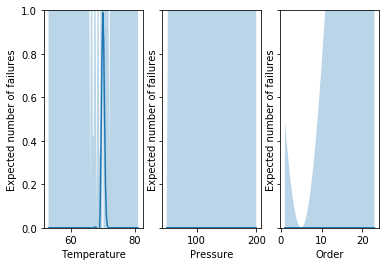

In [77]:
f, ax = plt.subplots(1,3, sharey=True)
for i in range(3):
#i = 0
    
    #test_point = 0
    #new_point = np.atleast_2d(oring.test_targets[test_point])
    new_point = [.5,0,.1]
    new_point = np.tile(new_point, (100,1))
    new_point[:,i] = np.linspace(0,1,100)
    pred = gp.prediction(new_point)
    x = gp.training_object.denormalise(new_point, gp.training_object.targets_scale)[:,i]
    ax[i].plot(x, pred[0])
    ax[i].set_ylim([0,1])
    #plt.xlim([0,gp.training_object.targets_scale[1][i]])
    ax[i].set_xlabel(gp.training_object.target_names[i])
    #plt.xlabel(r"Superplasticiser [kg / m$^3$]")
    ax[i].set_ylabel("Expected number of failures")
    err = np.diag(pred[1])
    err = gp.training_object.denormalise(err, gp.training_object.labels_scale)
    err *= 1.96
    ax[i].fill_between(x, pred[0] - err, pred[0] + err , alpha = 0.3)
    #ax[i].plot(gp.training_object.denormalise(oring.test_targets[test_point], gp.training_object.targets_scale)[i], 
    #        gp.training_object.denormalise(oring.test_labels, gp.training_object.labels_scale)[test_point], '.')
    #plt.savefig('superplasticiser.png', dpi=300)